## EVALUATION DU MODELE XGBOOST POUR PLUMENET
### Thierry

In [1]:
# Insatllation des packages
! pip install scikit-learn
! pip install xgboost
! pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [3]:
# Initialisation des variables d'environnement
plumnet_random_state=42

In [4]:
# Chargement des données
data_dir = 'french_bird_db'
dataset = 'french_bird_db_200_400'
dir_path = os.path.join('..',data_dir, dataset)
print(dir_path)

../french_bird_db/french_bird_db_200_400


../french_bird_db/french_bird_db_200_400/acanthis_flammea/acanthis_flammea_0.jpg


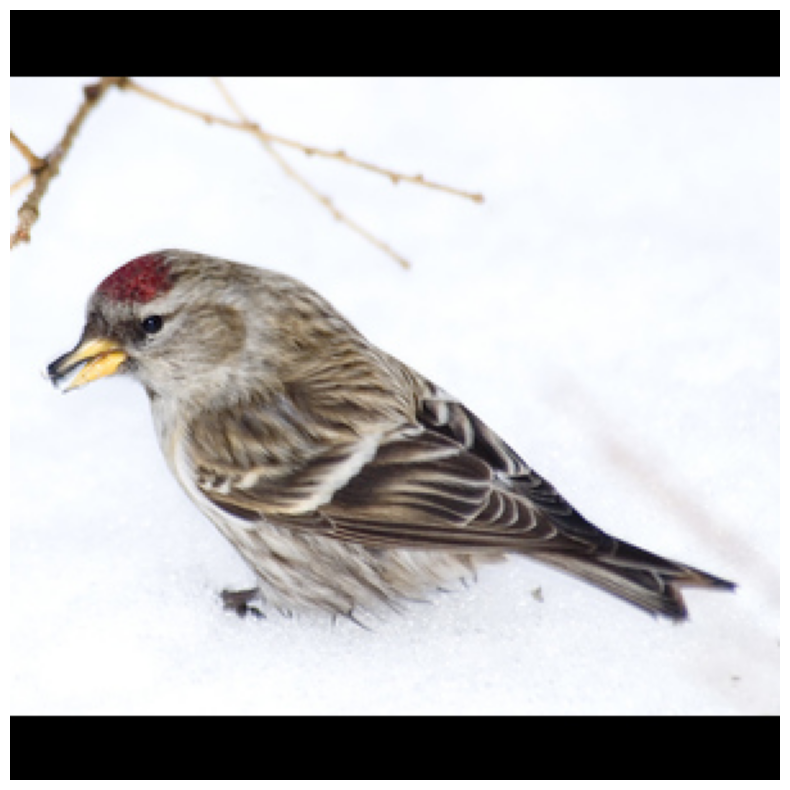

In [5]:
# Image de test
espece = 'acanthis_flammea'
image_test = 'acanthis_flammea_0.jpg'
file_path = os.path.join(dir_path, espece, image_test)
print(file_path)

img = plt.imread(file_path)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
plt.show()

In [6]:
# Format des images
print(img.shape)

(300, 300, 3)


In [7]:
# ----------------------------------------------------- CHARGEMENT DU DATASET -------------------------------------------------------------

# Liste des répertoires = liste des espèces
repertoires = [nom for nom in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, nom))]
repertoires = sorted(repertoires)

liste_images = []
liste_especes = []
X_constr = []
y_constr = []
espece_id = 0

nb_images = 0

# Récupération du nom des images
for repertoire in repertoires :
    liste_especes.append({'nom' : repertoire, 'id' : espece_id})
    dir_espece = os.path.join(dir_path, repertoire)
    #print(dir_espece)
    
    for fichier in os.listdir(dir_espece) :
            #print(fichier)
            nom_fichier = os.path.join(dir_espece, fichier)
            img = plt.imread(nom_fichier)
            img = img.reshape(-1)
            #print(img.shape[0])
            if (img.shape[0] == 300*300*3) :
                X_constr.append(nom_fichier)
                y_constr.append(espece_id)
    espece_id += 1
liste_especes = pd.DataFrame(liste_especes)

In [8]:
X_link = np.array(X_constr)
X_link.reshape(-1,1)
X_link.shape

(79891,)

In [9]:
y = np.array(y_constr)
y.reshape(-1,1)
print(y.shape)
print(y)

(79891,)
[  0   0   0 ... 199 199 199]


In [10]:
#print(liste_especes)

In [11]:
# Split sur les liens
X_link_train, X_link_test, y_train, y_test = train_test_split(X_link, y, test_size=0.2, shuffle=True, random_state=plumnet_random_state)
print(X_link_train.shape, y_train.shape, X_link_test.shape, y_test.shape)

(63912,) (63912,) (15979,) (15979,)


In [12]:
# Instanciation du modèle incrementalPCA
pca_components = 150
ipca = IncrementalPCA(n_components=pca_components)

In [13]:
# Préparation des données pour un batch : chargement des images, reshape et PCA
def preparation (batch) : 
    # Chargement des images
    liste_images = []
        
    for index in range(len(batch)) :
        #print("Image", index)
        fic = batch[index]
        img = plt.imread(fic)

        # Reshape avec 270000 features
        img = img.reshape(-1)
        liste_images.append(img)

    X_processed = np.array(liste_images) 
    #print("Shape = ", X_processed)
    
    # Standardisation des données
    X_processed = X_processed / 255

    return X_processed

In [14]:
# Creation des batchs équilibrés avec stratified K-fold
# On découpe X_link_train en batchs qui contiennent toutes les classes
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

batch_size = 300  # nombre d'images par batch
nb_batchs = int(np.ceil(X_link_train.shape[0] / batch_size)) #nombre batchs à faire tourner pour entrainer le modèle
print("nb_batchs = ", nb_batchs)
skf = StratifiedKFold(n_splits=nb_batchs, shuffle=True, random_state=plumnet_random_state)

# Boucle d'entrainement du PCA
for train_index, test_index in skf.split(X_link_train, y_train):
    X_batch = X_link_train[test_index]
    X_batch_processed = preparation(X_batch)
    if X_batch_processed.shape[0] >= pca_components :
        print("pca partiel")
        ipca.partial_fit(X_batch_processed)

nb_batchs =  214


pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca partiel
pca 

In [15]:
# Instanciation xgb incremental
# https://shunya-vichaar.medium.com/incremental-learning-in-xgboost-b3eac6135ce

# Définition des paramètres
params = {    
    'objective' : 'multi:softmax',
    'num_class' : len(liste_especes),
    'n_estimators' : 150,
    'max_depth' : 7,
    'eval_metric': 'merror',
    'eta': 0.3,
    'gamma' : 0,
    'reg_lambda': 1,
    'booster' : 'gbtree',
}
model = xgb.XGBClassifier(**params)

: 

In [16]:
# Boucle fit incrémental du modèle XGB

batch_id = 0

for train_index, test_index in skf.split(X_link_train, y_train):
    print("batch ", batch_id)
    X_batch = X_link_train[test_index]
    X_batch_processed = preparation(X_batch)
    X_batch_processed = ipca.transform(X_batch_processed)
    y_batch = y_train[test_index]

    if batch_id == 0:
        #print("X shape ", X_batch_processed.shape,"y shape ", y_batch.shape)
        model = model.fit(X_batch_processed, y_batch)
    else:
        y_train_pred = model.predict(X_batch_processed)
        acc_train = accuracy_score(y_train_pred,y_batch)
        print("Accuracy train before = ", acc_train)
        model = model.fit(X_batch_processed, y_batch, xgb_model=model.get_booster())

    batch_id += 1

    
    y_train_pred = model.predict(X_batch_processed)
    acc_train = accuracy_score(y_train_pred,y_batch)
    print("Accuracy train after = ", acc_train)

batch  0
Accuracy train after =  1.0
batch  1
Accuracy train before =  0.0033444816053511705
Accuracy train after =  0.9966555183946488
batch  2
Accuracy train before =  0.006688963210702341
Accuracy train after =  1.0
batch  3
Accuracy train before =  0.010033444816053512
Accuracy train after =  0.9632107023411371
batch  4
Accuracy train before =  0.0033444816053511705
Accuracy train after =  0.9832775919732442
batch  5
Accuracy train before =  0.010033444816053512
Accuracy train after =  0.9297658862876255
batch  6
Accuracy train before =  0.010033444816053512
Accuracy train after =  0.979933110367893
batch  7
Accuracy train before =  0.0033444816053511705
Accuracy train after =  0.9230769230769231
batch  8
Accuracy train before =  0.010033444816053512
Accuracy train after =  0.8294314381270903
batch  9
Accuracy train before =  0.016722408026755852
Accuracy train after =  0.9632107023411371
batch  10
Accuracy train before =  0.006688963210702341
Accuracy train after =  0.832775919732

In [ ]:
# Calcul de l'accuracy
# Test
X_test_processed = preparation(X_link_test)
# on limite X_test/y_test
X_test_processed = X_test_processed[:200]
X_test_processed = ipca.transform(X_test_processed)
y_pred = model.predict(X_test_processed)
acc_test = accuracy_score(y_pred, y_test)
print("Accuracy test = ", acc_test)

#Train
y_train_pred = model.predict(X_batch_processed)
acc_train = accuracy_score(y_train_pred,y_batch)
print("Accuracy train = ", acc_train)

Accuracy test =  0.112
Accuracy train =  1.0
